# Black Scholes Formula

---

In [36]:
from math import exp, log, sqrt

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.style.use("seaborn-v0_8-whitegrid")

## History

The Black–Scholes PDE has its roots in work going back to 1900. In his thesis Théorie de la Spéculation, Louis Bachelier modeled asset prices with Brownian motion and derived option prices in a diffusion framework, but his ideas were largely forgotten by economists for many years.
​

In the 1960s, continuous‑time finance and asset‑pricing theory matured, with models like CAPM clarifying how risky assets relate to the risk‑free rate. Several authors proposed option pricing formulas, but these typically depended on risk preferences or ad‑hoc assumptions rather than a clean no‑arbitrage argument.
​

The breakthrough came in 1973 when Fischer Black and Myron Scholes published “The Pricing of Options and Corporate Liabilities,” showing how to build a self‑financing, dynamically hedged portfolio of stock and option that is locally riskless and must earn the risk‑free rate, leading directly to the Black–Scholes PDE and closed‑form prices for European options. Independently, Robert C. Merton developed a related continuous‑time framework and in “Theory of Rational Option Pricing” generalized and reformulated the result, emphasizing its theoretical foundations.
​

The model appeared just as listed options markets like the CBOE were emerging, and it quickly became the standard tool for quoting and hedging options. In 1997, Merton and Scholes received the Nobel Prize in Economics for this work, and the Black–Scholes framework remains the starting point for modern derivatives modeling despite its simplifying assumptions.

## Black Scholes PDE

Under the Black-Scholes (BS) assumptions, there exists an economy that permits no arbitrage. In our economy, our asset (stock) price follows a Geometric Brownian Motion (GBM) with constant drift $\mu$ and volatility $\sigma$ under the physical measure,
$$
dS_t = \mu S_t dt + \sigma S_t dW_t,
$$
and that the risk free-rate is $r$ freely available, i.e. we have a bond with dynamics
$$
dB_t = r B_t dt.
$$
Let's construct a portfolio of one short call, and long $\Delta$ shares, i.e.
$$ 
\Pi(S, t) = -C(S, t) + \Delta S_t.
$$

By Ito's Lemma we have:
$$
d\Pi(S, t) = -\left(\frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S} dS_t + \frac{1}{2}\sigma^2 S_t^2 \frac{\partial^2 C}{\partial S^2} dt\right) + \Delta dS_t.
$$

By taking $\Delta = \frac{\partial C}{\partial S}$, we eliminate the random terms, leaving only deterministic growth in the portfolio:

$$
d\Pi(S, t) = - \left(\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S_t^2 \frac{\partial^2 C}{\partial S^2}\right) dt.
$$

Because we cannot permit any arbitrage, a riskless portfolio must earn the same as our bond, i.e.
$$ 
d\Pi(S, t) = r \Pi dt = r \left(-C + \frac{\partial C}{\partial S} S_t\right) dt,
$$ 

so we must have
$$ 
\begin{align*}
-rC + r\frac{\partial C}{\partial S} S_t  &= - \frac{\partial C}{\partial t} - \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} \\
\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + rS_t\frac{\partial C}{\partial S} -rC &= 0.
\end{align*}
$$
We have derived the famous BS PDE. The solution to the BS PDE with the terminal boundary condition given by the European option payoff is known as the BS formula.

There are two main classes of approach to solve the BS PDE, namely the PDE approach and the probabilistic approach. Each approach gives us unique insights into how options behave.

In the case of constant parameters, along with standard (non-path-dependent and European-style) payoffs, the BS PDE admits a closed-form solution. In the following, we impose the European call option payoff
$$
C(S,t;K,T) = (S_T-K)^+,
\qquad t=T,
$$
where $(x)^+ \equiv \max(x,0)$, $K$ is the strike price, and $T$ is the maturity.

## Probabilistic Approach

We first solve the PDE via the probabilistic approach. Since the BS PDE is linear and parabolic, we can transform the PDE to a probabilistic representation via the Feynman-Kac theorem
$$
C(S_t,t) =
\mathbb E_t^{\mathbb Q}\!\left[
D_r(t,T)\,C(S_T,T)
\right],
$$
where the discount factor is
$$
D_r(t,T)=\frac{M(t)}{M(T)}=e^{-r(T-t)},
$$
and $\mathbb Q$ is the risk-neutral (money market) measure associated with the numeraire
$$
M(t)=e^{rt}.
$$

By Girsanov's theorem, the risk-neutral dynamics of the underlying asset are
$$
dS_t = r S_t\,dt + \sigma S_t\, dW_t^{\mathbb Q}.
$$
Solving this SDE yields
$$
S_T =
S_t \exp\!\left(
\left(r-\tfrac12\sigma^2\right)(T-t)
+ \sigma\sqrt{T-t}\,Z
\right),
\qquad Z\sim \mathcal N(0,1),
$$
hence, implying $S_T$ is lognormal
$$
\ln S_T \sim
\mathcal N\!\left(
\ln S_t + \left(r-\tfrac12\sigma^2\right)(T-t),
\;\sigma^2(T-t)
\right).
$$

Equivalently, the risk-neutral density of $S_T$ conditional on $S_t$ is
$$
\phi_{S_T}(s) =
\frac{1}{s\,\sigma\sqrt{2\pi (T-t)}}
\exp\!\left(
-\frac{\left(\ln s - \ln S_t - \left(r-\tfrac12\sigma^2\right)(T-t)\right)^2}
{2\sigma^2 (T-t)}
\right),
\qquad s>0.
$$

Applying the payoff and expressing the expectation as an integral gives
$$
\begin{aligned}
C(S_t,t)
&=
e^{-r(T-t)}
\int_0^\infty (s-K)^+\,\phi_{S_T}(s)\,ds \\
&=
e^{-r(T-t)}
\int_K^\infty (s-K)\,\phi_{S_T}(s)\,ds.
\end{aligned}
$$

Splitting the integral, we get
$$
C(S_t,t) =
e^{-r(T-t)}
\left(
\int_K^\infty s\,\phi_{S_T}(s)\,ds -
K\int_K^\infty \phi_{S_T}(s)\,ds
\right).
$$

Using the properties of the lognormal distribution, these integrals evaluate to
$$
\int_K^\infty \phi_{S_T}(s)\,ds = 
\Phi(d_2), 
\qquad
\int_K^\infty s\,\phi_{S_T}(s)\,ds = S_t e^{r(T-t)} \Phi(d_1),
$$
where
$$
d_1 =
\frac{\ln(S_t/K)+(r+\tfrac12\sigma^2)(T-t)}{\sigma\sqrt{T-t}},
\qquad
d_2 =
d_1-\sigma\sqrt{T-t}.
$$

Substituting back, we obtain the BS formula for a European call option:
$$
\boxed{
C(S_t,t) =
S_t \Phi(d_1) -
K e^{-r(T-t)} \Phi(d_2)
}.
$$

## PDE Approach (via heat equation)

Again, we start from the BS PDE for a European call option $C(S,t)$:

$$
\frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + r S \frac{\partial C}{\partial S} - r C = 0,
$$
with terminal condition at $t=T$ (payoff):
$$
C(S,T) = \max(S-K,0).
$$

By the change of variable $x = \ln(S/K)$, we have $S = K e^x$ and

$$
\frac{\partial C}{\partial S} = \frac{1}{S} \frac{\partial C}{\partial x}, \quad
\frac{\partial^2 C}{\partial S^2} = \frac{1}{S^2} \left( \frac{\partial^2 C}{\partial x^2} - \frac{\partial C}{\partial x} \right),
$$

which transforms the PDE to

$$
\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 C}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial C}{\partial x} - r C = 0.
$$

Defining a discounted function $C(S,t) = e^{-r(T-t)} V(x,t)$ removes the $-r C$ term, yielding

$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 V}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial V}{\partial x} = 0.
$$

Using the time-to-maturity $\tau = T-t$ so that $\partial/\partial t = -\partial/\partial \tau$, the PDE becomes

$$
\frac{\partial V}{\partial \tau} = \frac{1}{2}\sigma^2 \frac{\partial^2 V}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial V}{\partial x}.
$$

Introducing $V(x,\tau) = e^{\alpha x + \beta \tau} u(x,\tau)$ with

$$
\alpha = -\frac{r - \frac{1}{2}\sigma^2}{\sigma^2}, \quad
\beta = -\frac{1}{2}\sigma^2 \alpha^2 - \left(r - \frac{1}{2}\sigma^2\right)\alpha,
$$

removes the first derivative term and reduces the PDE to the heat equation

$$
\frac{\partial u}{\partial \tau} = \frac{1}{2}\sigma^2 \frac{\partial^2 u}{\partial x^2},
$$

with initial condition

$$
u(x,0) = e^{-\alpha x} \max(K e^x - K, 0).
$$

The solution of the heat equation is

$$
u(x,\tau) = \frac{1}{\sqrt{2 \pi \sigma^2 \tau}} \int_{-\infty}^{\infty} u(y,0) \exp\left( - \frac{(x-y)^2}{2 \sigma^2 \tau} \right) dy,
$$

and transforming back gives

$$
C(S,t) = e^{-r(T-t)} V(x,\tau) = e^{-r(T-t)} e^{\alpha x + \beta \tau} u(x,\tau),
$$

which simplifies to the BS formula

$$
\boxed{
C(S,t) = S \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2),
}
$$

with

$$
d_1 = \frac{\ln(S/K) + \left(r + \frac{1}{2}\sigma^2\right)(T-t)}{\sigma \sqrt{T-t}}, \quad
d_2 = d_1 - \sigma \sqrt{T-t}.
$$

Thus, we reproduced the BS formula using the PDE approach.

## Analytical Solution 

We'll verify the analytical solution derived from the PDE with a Monte Carlo estimate of the expectation.

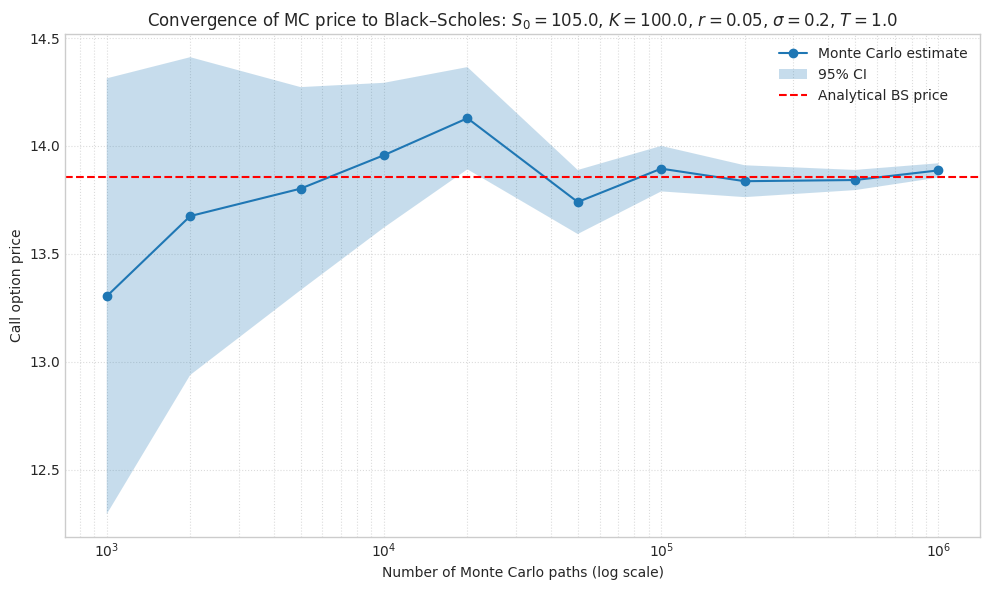

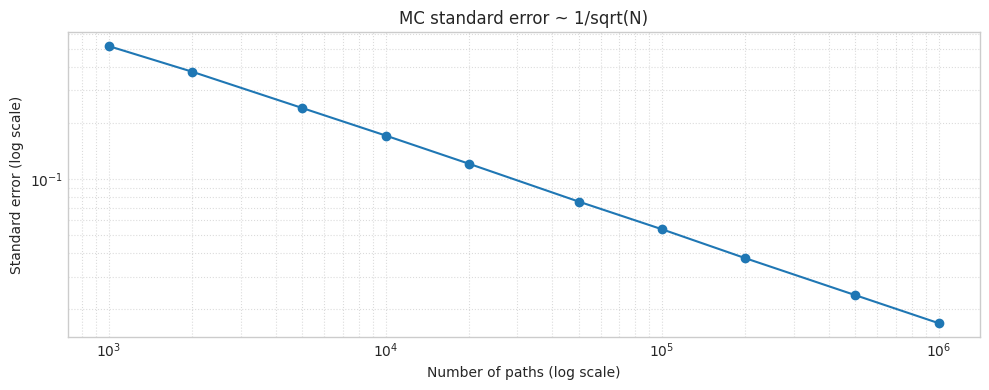

In [39]:
# =============================
# Parameters
# =============================
S0 = 105.0  # initial stock price
K = 100.0  # strike
r = 0.05  # risk-free rate
sigma = 0.20  # volatility
T = 1.0  # maturity (years)

path_counts = np.array(
    [1_000, 2_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000, 500_000, 1_000_000]
)

seed = 42
rng = np.random.default_rng(seed)

# =============================
# Analytical Black–Scholes price
# =============================
d1 = (log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
d2 = d1 - sigma * sqrt(T)

bs_price = S0 * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

# =============================
# Monte Carlo pricing (one-step Euler exact S_T)
# =============================
mc_prices = []
ci_lower = []
ci_upper = []
std_errs = []

for N in path_counts:
    Z = rng.standard_normal(N)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0.0)
    discounted_payoff = exp(-r * T) * payoff

    mean_price = discounted_payoff.mean()
    std_error = discounted_payoff.std(ddof=1) / np.sqrt(N)

    mc_prices.append(mean_price)
    std_errs.append(std_error)
    ci_lower.append(mean_price - 1.96 * std_error)
    ci_upper.append(mean_price + 1.96 * std_error)

mc_prices = np.array(mc_prices)
std_errs = np.array(std_errs)
ci_lower = np.array(ci_lower)
ci_upper = np.array(ci_upper)

# =============================
# Plot convergence
# =============================
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(path_counts, mc_prices, marker="o", label="Monte Carlo estimate")
ax.fill_between(path_counts, ci_lower, ci_upper, alpha=0.25, label="95% CI")
ax.axhline(bs_price, linestyle="--", color="red", label="Analytical BS price")

ax.set_xscale("log")
ax.set_xlabel("Number of Monte Carlo paths (log scale)")
ax.set_ylabel("Call option price")
ax.set_title(
    rf"Convergence of MC price to Black–Scholes: "
    rf"$S_0={S0}$, $K={K}$, $r={r}$, $\sigma={sigma}$, $T={T}$"
)
ax.legend()
ax.grid(True, which="both", linestyle=":", alpha=0.7)

plt.tight_layout()
plt.show()

# Optional: plot standard error vs N to show 1/sqrt(N) behavior
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(path_counts, std_errs, marker="o")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Number of paths (log scale)")
ax.set_ylabel("Standard error (log scale)")
ax.set_title("MC standard error ~ 1/sqrt(N)")
ax.grid(True, which="both", linestyle=":", alpha=0.7)
plt.tight_layout()
plt.show()

## In-the-Money (ITM) Risk Neutral Probability
Showing that
$$
\mathbb{Q}(S_T > K) = \Phi(d_2)
$$
is left as an exercise for the reader. The interpretation of this can be thought of as a formula for the market-implied risk-neutral in-the-money probability - it is market implied as $d_2$ depends on the market implied volatility.

For short-dated options, practitioners can often use the call delta $\Delta = \Phi(d_1)$ as a proxy for this probability; when $T - t$ is small, the term $\sigma \sqrt{T - t}$ is small and
$$
d_1 = d_2 + \sigma \sqrt{T - t}
$$
implies $d_1 \approx d_2$, so $\Delta \approx \Phi(d_2) \approx \mathbb{Q}(S_T > K)$. 

As an exercise, it is also easy to find the out of the money probability as well.

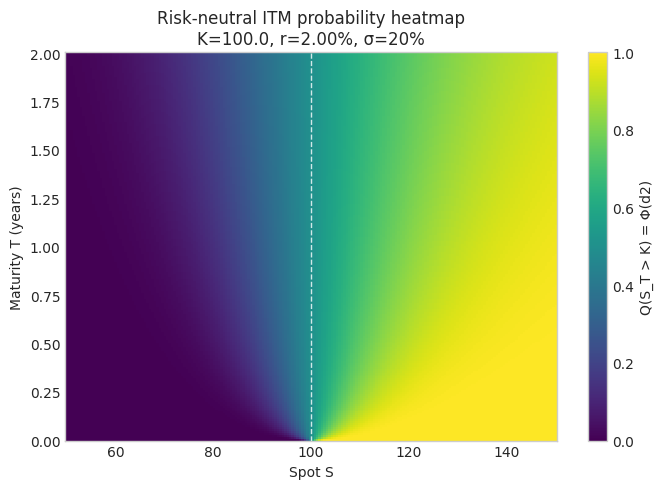

In [37]:
# Parameters
K = 100.0
r = 0.02
sigma = 0.2


def d2(S, K, r, sigma, T):
    S = np.asarray(S, dtype=float)
    T = np.asarray(T, dtype=float)
    sqrt_T = np.sqrt(T)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt_T)
    d2 = d1 - sigma * sqrt_T
    return d2


# Grid ranges
S_min, S_max = 50.0, 150.0
T_min, T_max = 1 / 252, 2.0  # ~1 day to 2 years

S_grid = np.linspace(S_min, S_max, 200)
T_grid = np.linspace(T_min, T_max, 200)

S_mesh, T_mesh = np.meshgrid(S_grid, T_grid)

d2_mesh = d2(S_mesh, K, r, sigma, T_mesh)
q_itm_mesh = norm.cdf(d2_mesh)  # risk-neutral ITM probability

fig, ax = plt.subplots(figsize=(7, 5))

c = ax.pcolormesh(
    S_mesh, T_mesh, q_itm_mesh, shading="auto", cmap="viridis", vmin=0.0, vmax=1.0
)

ax.axvline(K, color="white", linestyle="--", linewidth=1, alpha=0.8)

cb = fig.colorbar(c, ax=ax)
cb.set_label("Q(S_T > K) = Φ(d2)")

ax.set_xlabel("Spot S")
ax.set_ylabel("Maturity T (years)")
ax.set_title(f"Risk-neutral ITM probability heatmap\nK={K}, r={r:.2%}, σ={sigma:.0%}")

plt.tight_layout()
plt.show()